# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Base_dados.csv')

df = df.drop(columns='Unnamed: 0', axis=1)

df['data_ref'] = pd.to_datetime(df['data_ref'])
df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [ ]:
def var_qualitativa(data):
    qualitativa_data = data.select_dtypes(include=['object', 'boolean'])  # Seleciona colunas qualitativas
    return qualitativa_data
qualitativa_df = var_qualitativa(data=df)
qualitativa_df

,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,M,True,True,Empresário,Secundário,Casado,Casa,False
2,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,F,True,False,Empresário,Secundário,Casado,Casa,False
4,M,False,False,Assalariado,Secundário,Casado,Casa,False
...,...,...,...,...,...,...,...,...
14995,M,True,True,Assalariado,Secundário,Casado,Casa,False
14996,M,True,True,Servidor público,Superior completo,Casado,Estúdio,False
14997,F,True,True,Assalariado,Secundário,Casado,Casa,False
14998,F,False,True,Servidor público,Superior completo,Casado,Casa,False


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

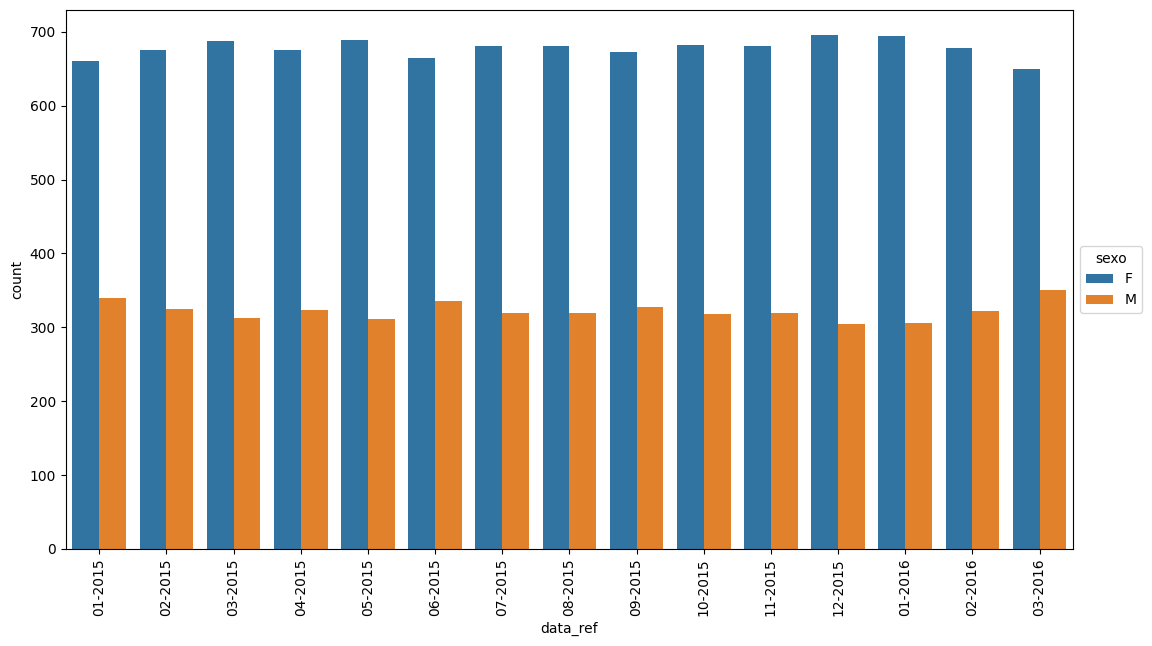

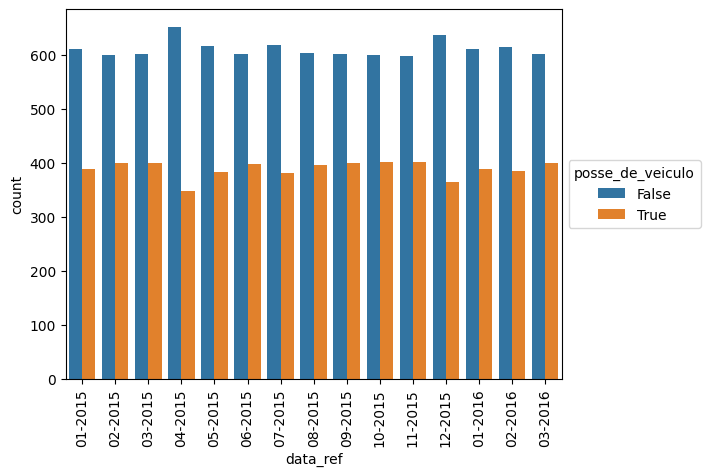

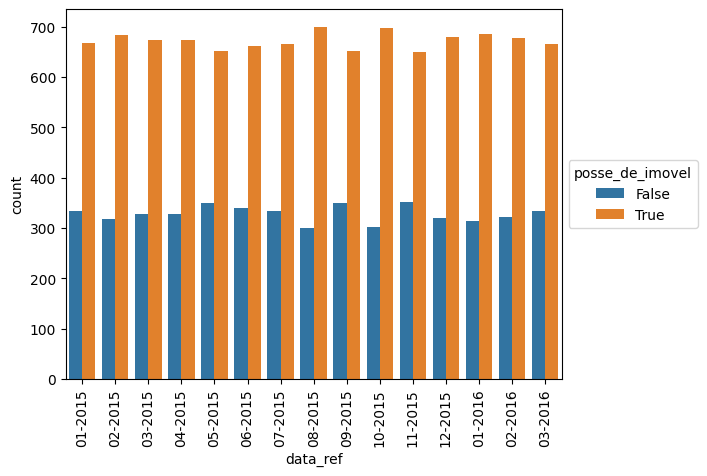

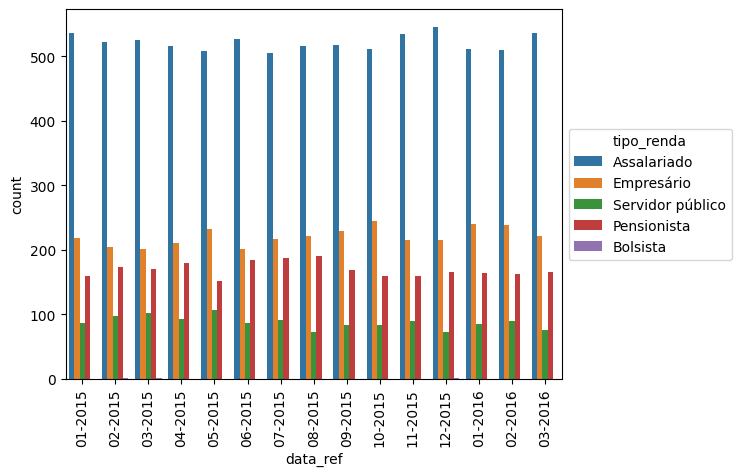

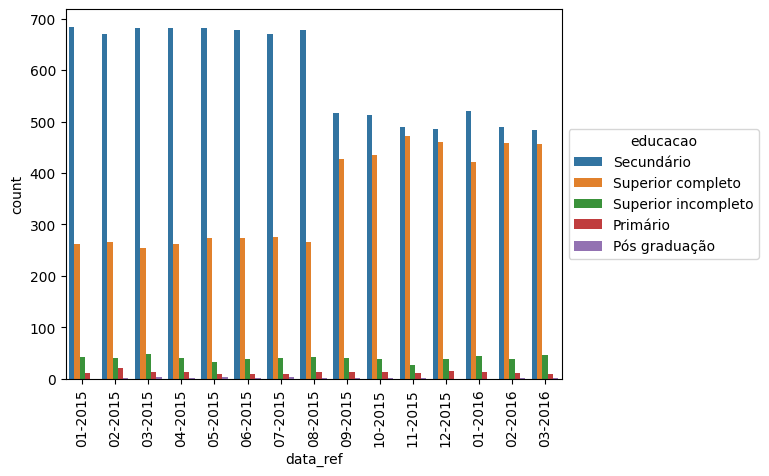

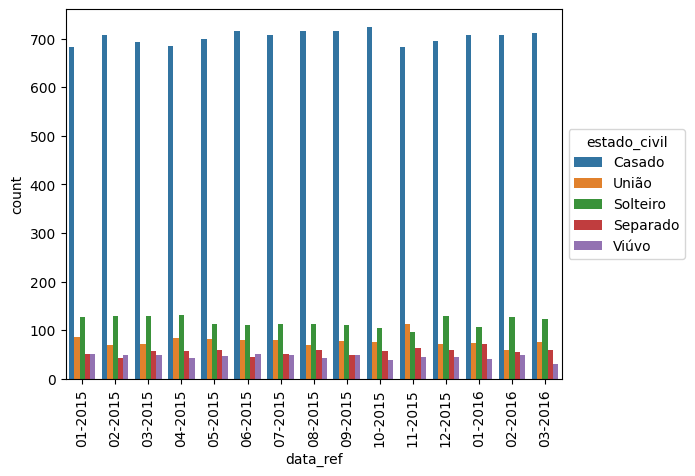

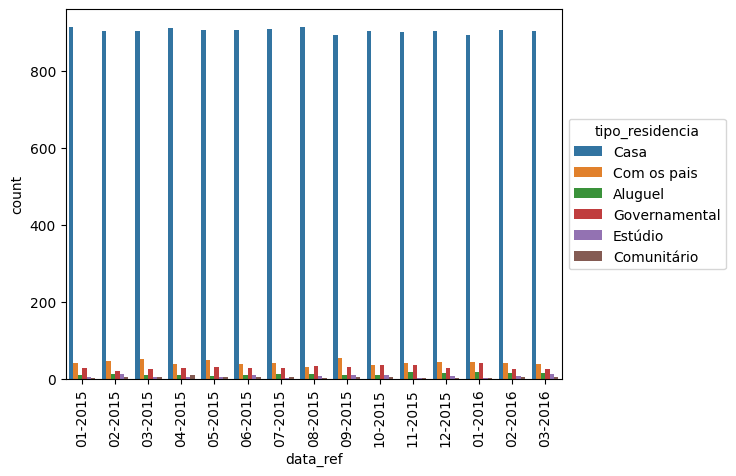

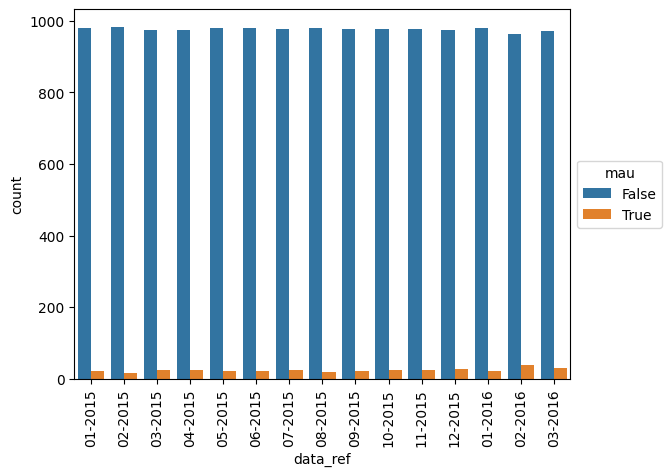

In [ ]:
plt.figure(figsize=(13,7))

for i in qualitativa_df:
  ax = sns.countplot(x= 'data_ref', hue=i, data=df)
  tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

  ax.set_xticklabels(tick_labs, rotation=90)
  ax.legend(bbox_to_anchor=(1,.5), loc=6, title=f"{i}")

  plt.show()

Das variáveis qualitativas que se destaca das demais é a escolaridade, onde houve um aumento significativo de dados com a escolaridade de ensino superior completo a partir de setembro de 2015 consequentemente houve uma queda na variavel escolaridade secundária.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

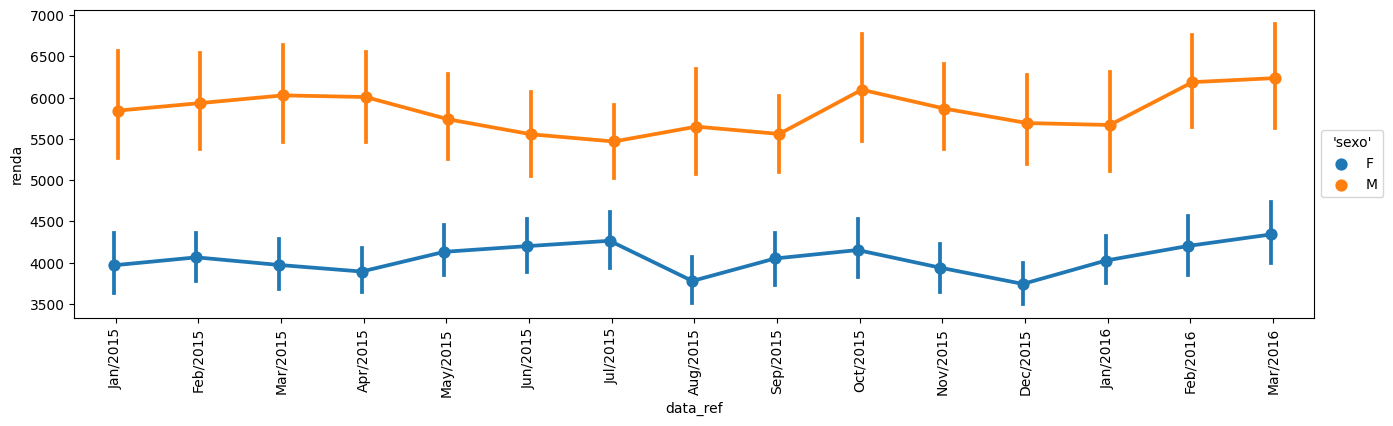

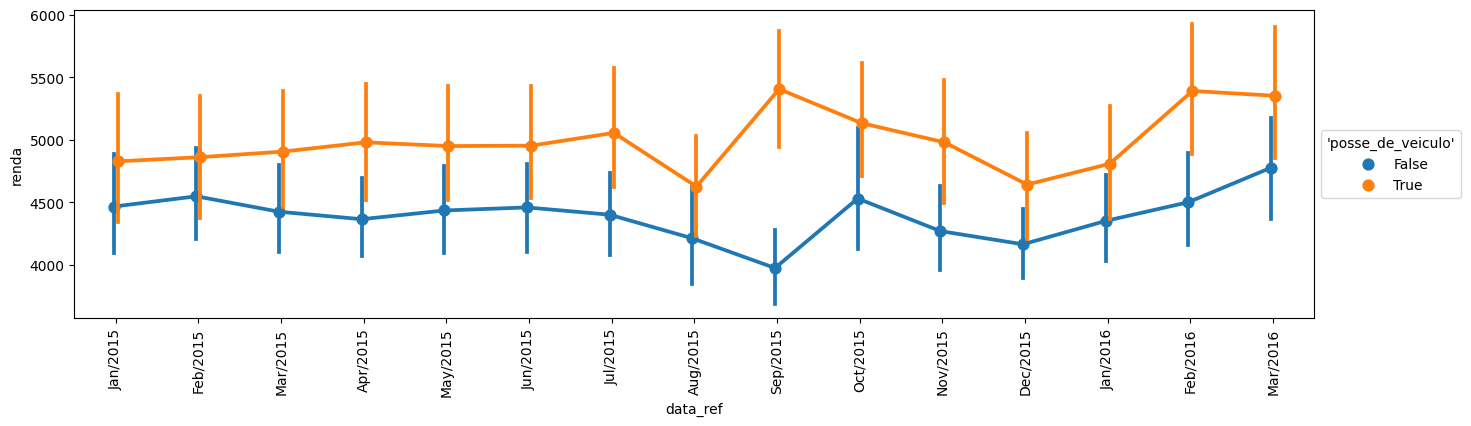

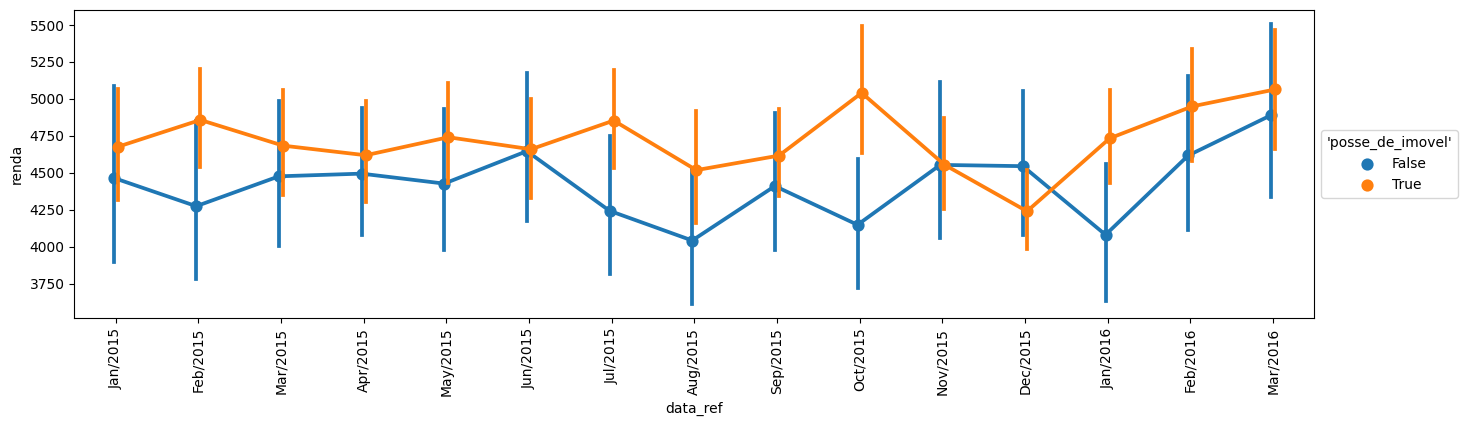

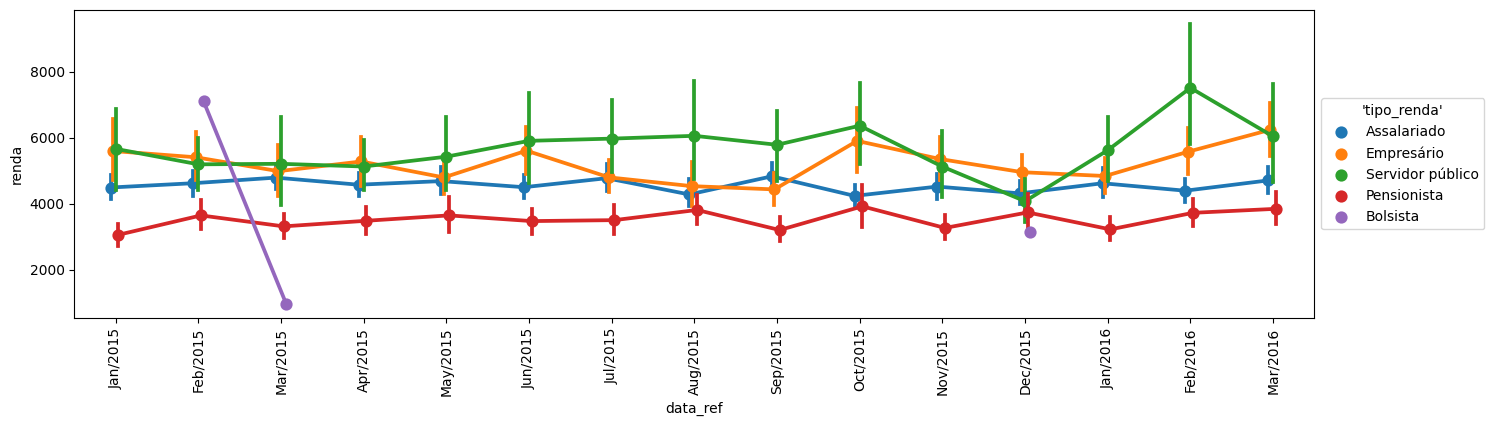

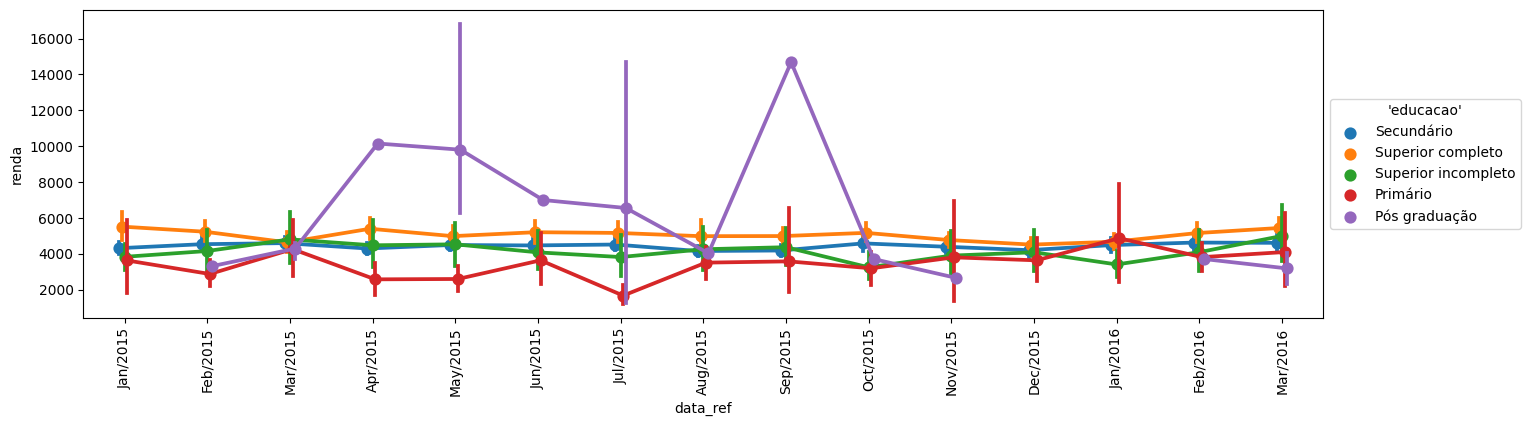

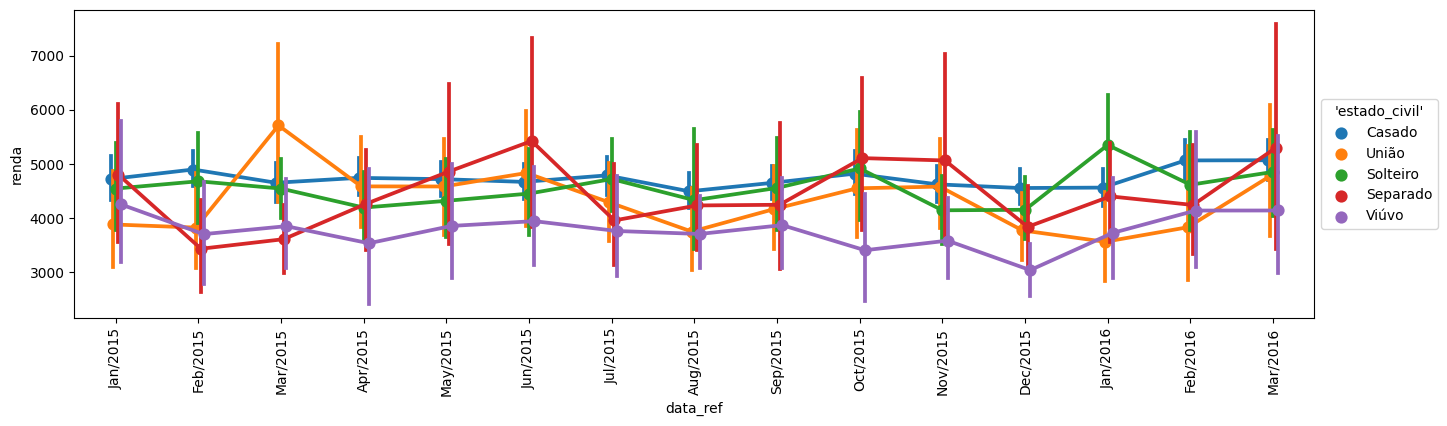

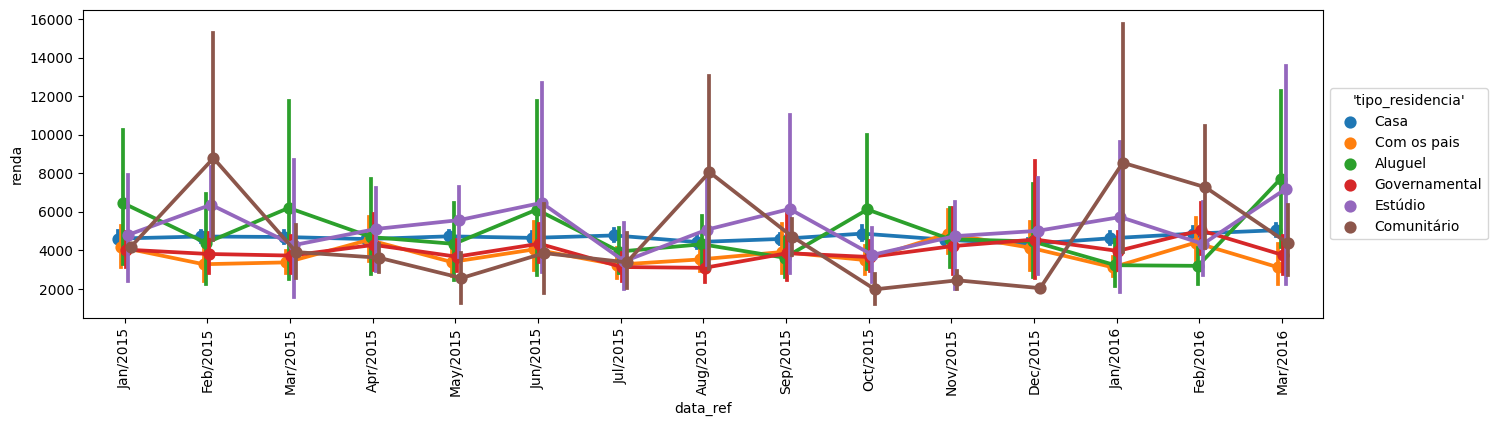

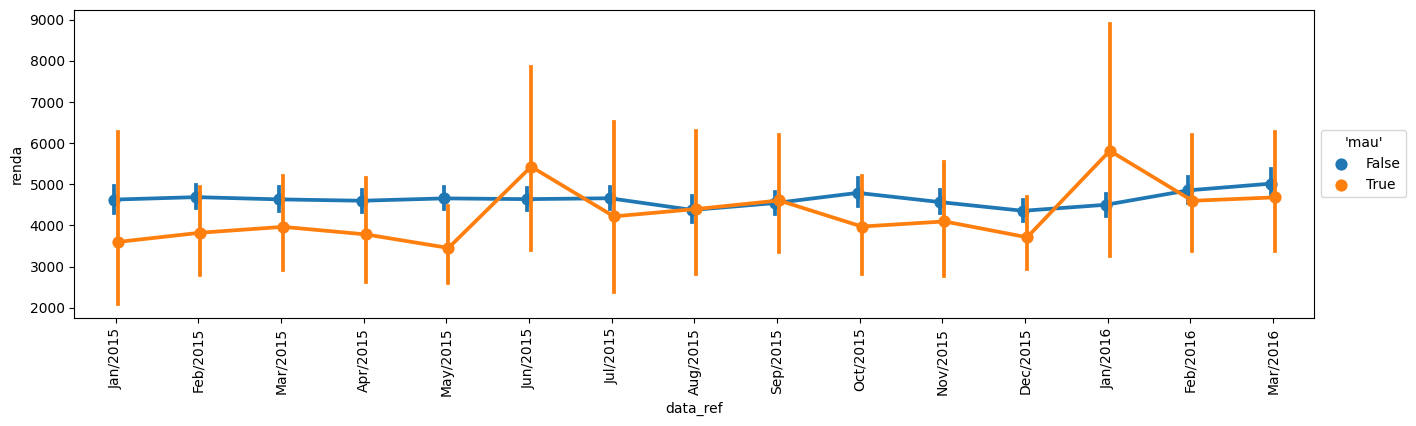

In [ ]:
plt.rc('figure', figsize=(16,4))

for i in qualitativa_df:
    ax = sns.pointplot(x='data_ref', y='renda', hue=i, data=df, dodge=True,)
    tick_labels = df['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()

    ax.set_xticklabels(tick_labels, rotation=90)
    ax.legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{i}'")

    plt.show()

Percebe-se que as variáveis indicam que aqueles que possuem veículo e imóvel apresentam uma renda maior. É importante destacar o mês de dezembro de 2015, no qual ocorreu uma maior renda para aqueles que não possuíam imóvel.